In [53]:
import json
import pandas as pd

# Loading data

In [54]:
# Read training data or testing data
df = pd.read_json('training_set.json')

# Visualise the top five examples
df.head(n=5)

,intent,sentence
0,irrelevant,"850€ maximum pour le loyer, à partir de janvie..."
1,irrelevant,D'imprimer
2,purchase,Le meilleur cabriolet hybrid moins de 5m10 min...
3,find-hotel,en ce moment je cher un location pour les vaca...
4,irrelevant,c'est possible de t'utiliser la nuit ?


# Frequency of class

By visualising the frequancy of each class, we can observe that there is a huge data imbalance between the classes.

This has to be taken into consideration during both training and testing.

In [55]:
# The frequency of each class
df.intent.value_counts(normalize=True) * 100

irrelevant           63.827672
purchase             10.157415
find-restaurant       7.771334
find-around-me        6.346313
find-hotel            5.236123
find-train            2.369511
find-flight           2.352941
provide-showtimes     1.938691
Name: intent, dtype: float64

<AxesSubplot:>

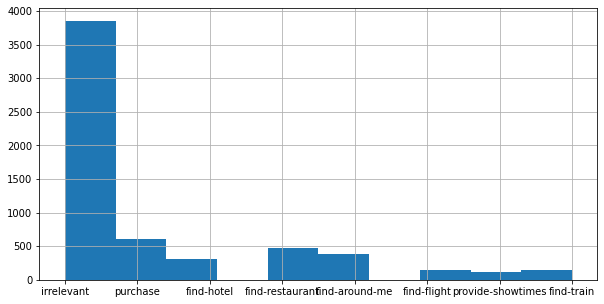

In [56]:
df.intent.hist(figsize=(10,5), xlabelsize=10)

# Sentence length

Sentence length could also be a good metric to visualize.

Here we are testing the number of words per sentence.

In [57]:
df["sentence_len"] = df.sentence.apply(len)
df.sentence_len.describe()

In order to get a more accurate representation of our data, we visualise the sentence length distribution per class.

We observe that there are some classes that have longer sentences than others.

For example: Find a hotel vs Provide Showtimes

In [59]:
dist = []

for clas in df.intent.unique():
    selected_class = df.loc[df['intent'] == clas]
    print('class: ', clas, '\n', selected_class.sentence_len.describe(), sep='')
    print('==================================')
    dist.append({'class': clas, 'description': selected_class.sentence_len.describe()})

class: irrelevant
count    3852.000000
mean       45.887072
std        40.568115
min         1.000000
25%        21.000000
50%        34.000000
75%        57.000000
max       445.000000
Name: sentence_len, dtype: float64
class: purchase
count    613.000000
mean      81.375204
std       50.099863
min        9.000000
25%       50.000000
50%       70.000000
75%       99.000000
max      483.000000
Name: sentence_len, dtype: float64
class: find-hotel
count    316.000000
mean      92.420886
std       60.760969
min       13.000000
25%       48.000000
50%       78.500000
75%      121.250000
max      326.000000
Name: sentence_len, dtype: float64
class: find-restaurant
count    469.000000
mean      73.002132
std       38.501998
min       19.000000
25%       45.000000
50%       64.000000
75%       90.000000
max      251.000000
Name: sentence_len, dtype: float64
class: find-around-me
count    383.000000
mean      74.357702
std       42.406287
min       14.000000
25%       45.000000
50%       65.00